<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Spam_Classifier_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [ ]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])  # Replace non-alphabetic characters with space
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]  # Stem and remove stopwords
    review = ' '.join(review)  # Join the processed words back into a sentence
    corpus.append(review)

In [ ]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i])  # Replace non-alphabetic characters with space
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]  # Stem and remove stopwords
    review = ' '.join(review)  # Join the processed words back into a sentence
    corpus.append(review)

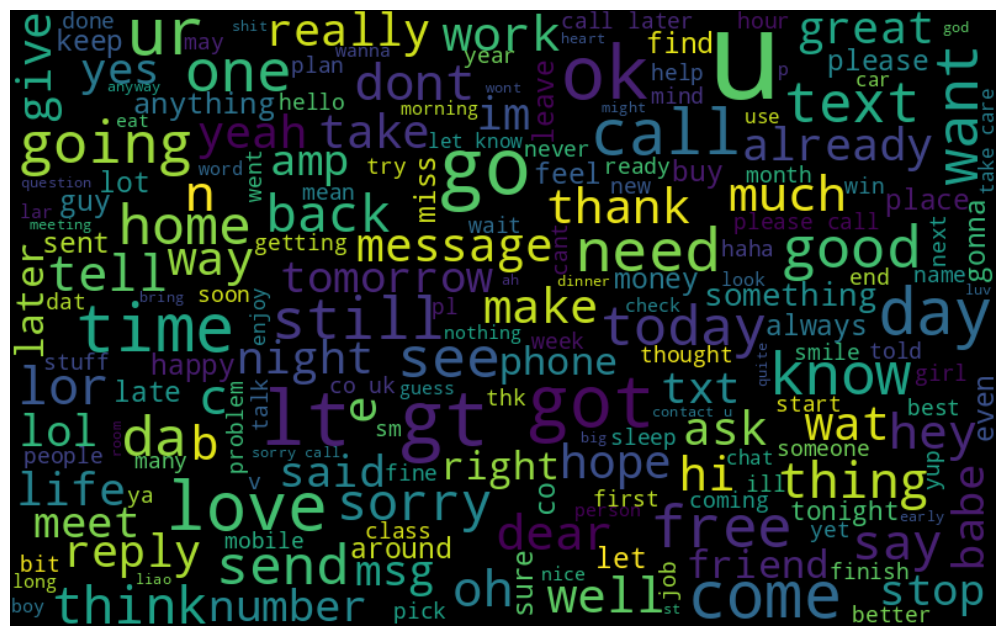

In [ ]:
all_words = " ".join([sentence for sentence in corpus])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = pd.get_dummies(df['label'])

In [ ]:
y = y.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

97.84688995215312
[[ 20300   3000]
 [   600 143300]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

96.11244019138756
[[ 19600   3700]
 [  2800 141100]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

98.20574162679426
[[ 20300   3000]
 [     0 143900]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(ac(y_test, y_pred)*100)
print(cm(y_test, y_pred)*100)

97.96650717703349
[[ 22100   1200]
 [  2200 141700]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

accuracy = ac(y_test, y_pred)*100
CM = cm(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion_matrics: {CM}")

Accuracy: 98.20627802690582
Confusion_matrics: [[138  11]
 [  9 957]]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                160064    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,177
Trainable params: 162,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 2s 7ms/step - loss: 0.3392 - accuracy: 0.9041 - val_loss: 0.0996 - val_accuracy: 0.9742
Epoch 2/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0466 - accuracy: 0.9877 - val_loss: 0.0702 - val_accuracy: 0.9821
Epoch 3/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.0781 - val_accuracy: 0.9843
Epoch 4/10
112/112 [==============================] - 1s 9ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.0815 - val_accuracy: 0.9832
Epoch 5/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0936 - val_accuracy: 0.9809
Epoch 6/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0993 - val_accuracy: 0.9809
Epoch 7/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1065 - val_accuracy: 0.9809
Epoch 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

35/35 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9883
Test Loss: 0.0699, Test Accuracy: 0.9883


In [ ]:
CM = cm(y_test, y_pred)
print(f"Confusion_matrics: {CM}")

Confusion_matrics: [[138  11]
 [  9 957]]


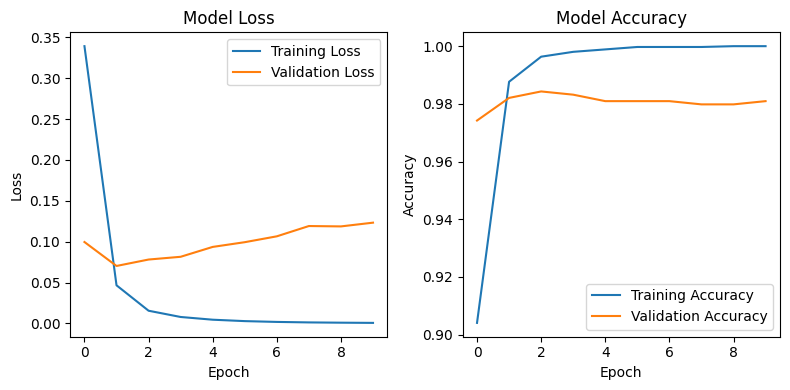

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
